In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense , Input
from tensorflow.keras.losses import MeanSquaredError , BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
from tensorflow.keras import Sequential

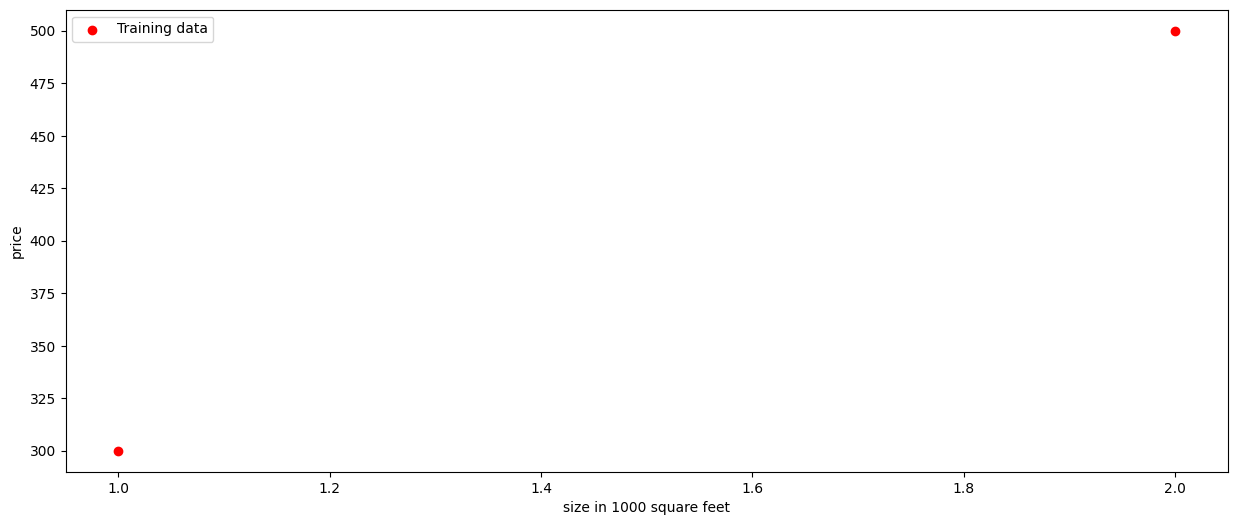

In [10]:
X_train = np.array([[1.0], [2.0]], dtype=np.float32)           #(size in 1000 square feet)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)

fig,ax = plt.subplots(1,1,figsize = (15,6))
ax.scatter(X_train,Y_train,marker = "o",c = "r",label = "Training data")
ax.legend()
ax.set_xlabel("size in 1000 square feet")
ax.set_ylabel("price")
plt.show()

In [15]:
###making the dance layers of the neural network
linear_layer1 = tf.keras.layers.Dense(units = 1 , activation = "linear")

this was the first layer of our first NN

In [16]:
##let us see the weighst on the layer
linear_layer1.get_weights()

[]

we didn´t get any weights as we have not initiated any weights to our layer

In [18]:
#lets try only for one example of x_train
a1 = linear_layer1(X_train[0].reshape(1,1)) # we did this bcz the layer needs the 2d input
print(a1)

tf.Tensor([[-0.26421022]], shape=(1, 1), dtype=float32)


In [19]:
linear_layer1.get_weights()

[array([[-0.26421022]], dtype=float32), array([0.], dtype=float32)]

In [31]:
set_w = np.array([[200]])
set_b = np.array([0.5])
linear_layer1.set_weights([set_w,set_b])


In [32]:
###now we will try the neural network with logistic regression
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

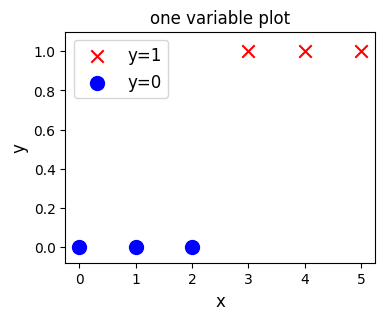

In [35]:
pos = Y_train == 1
neg = Y_train == 0

fig,ax = plt.subplots(1,1,figsize=(4,3))
ax.scatter(X_train[pos], Y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", facecolors='blue',
)

ax.set_ylim(-0.08,1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.legend(fontsize=12)
plt.show()

In [42]:
model = Sequential(
    [
        tf.keras.layers.Dense(1, input_dim=1,  activation = 'sigmoid', name='L1')
    ]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [46]:
logistic_layer = model.get_layer("L1")
w , b = logistic_layer.get_weights()
print(w,b)

[[-1.364245]] [0.]


In [47]:
predict = model.predict(X_train[0].reshape(1,1))



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


In [57]:
###lets build the NN with multiple layers suing Sequential
#model
model = Sequential(
    [
        Dense(3,input_shape=(2,),activation = "sigmoid",name = "L1"),
        Dense(1,activation = "sigmoid", name = "L2")
    ]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
#data
X_train = np.array([[200.7,100.66],
                   [100.6,208.00],
                   [400.7,599],
                   [399.55,77.99]])
y_train = np.array([1,0,0,1]).reshape(-1, 1)

In [59]:
#fit the modle
model.compile(loss = BinaryCrossentropy())
model.fit(X_train,y_train)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.7295
